In [1]:
####  Environment setting ####

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12
from sklearn import linear_model as lm

In [2]:
### Basic argument and data
datapath = './data/'
dataname = 'term_project_overlay_data.csv'

Overlay = pd.read_csv(datapath+dataname)


In [157]:

from sklearn.decomposition import PCA

In [3]:
Overlay

,overlay_error_x,overlay_error_y,x,X,y,Y
0,-1.34590,0.198500,5.29290,-142.580,5.64470,-28.385
1,-2.03890,1.561300,9.24490,-142.500,16.31900,-28.165
2,-0.97659,0.880620,9.17130,-124.980,16.33700,-28.421
3,-2.47930,0.065496,0.15941,-125.040,0.80494,-28.047
4,-0.74636,0.481090,9.26150,-107.150,-4.21550,-28.096
...,...,...,...,...,...,...
245,0.12118,0.710580,3.70370,35.641,-15.85400,134.160
246,-0.29287,0.296210,-3.59770,35.855,-5.38070,134.200
247,0.52011,1.357700,-3.82000,53.422,-5.03920,134.060
248,0.67443,1.527700,-8.72960,71.264,-15.66900,134.020


In [8]:
#Feature adding function
#Attention, in hst's dataset, the column with label x is actually ' x'  which has a space in front of x
def add_feature(data):
    data["XY"] = data["X"]*data["Y"]
    data["xy"] = data['x']*data["y"]
    data["X2"] = (data["X"])*data["X"]
    data["Y2"] = (data["Y"])*data["Y"]
    data["x2"] = (data["x"])*data["x"]
    data["y2"] = (data["y"])*data["y"]
    data["xY"] = (data["x"])*data["Y"]
    data["yX"] = (data["Y"]*data["x"])
    data["x3"] = (data["x"])*(data["x"])*(data["x"])
    data["y3"] = (data["y"])*(data["y"])*(data["y"])
    data["X3"] = (data["X"])*(data["X"])*(data["X"])
    data["Y3"] = (data["Y"])*(data["Y"])*(data["Y"])
    return data

Overlay_new = add_feature(Overlay)
Overlay_new

,overlay_error_x,overlay_error_y,x,X,y,Y,XY,xy,X2,Y2,x2,y2,xY,yX,x3,y3,X3,Y3
0,-1.34590,0.198500,5.29290,-142.580,5.64470,-28.385,4047.13330,29.876833,20329.056400,805.708225,28.014790,31.862638,-150.238967,-150.238967,148.279484,179.855033,-2.898517e+06,-2.287003e+04
1,-2.03890,1.561300,9.24490,-142.500,16.31900,-28.165,4013.51250,150.867523,20306.250000,793.267225,85.468176,266.309761,-260.382609,-260.382609,790.144740,4345.908990,-2.893641e+06,-2.234237e+04
2,-0.97659,0.880620,9.17130,-124.980,16.33700,-28.421,3552.05658,149.831528,15620.000400,807.753241,84.112744,266.897569,-260.657517,-260.657517,771.423206,4360.305585,-1.952188e+06,-2.295715e+04
3,-2.47930,0.065496,0.15941,-125.040,0.80494,-28.047,3506.99688,0.128315,15635.001600,786.634209,0.025412,0.647928,-4.470972,-4.470972,0.004051,0.521543,-1.955001e+06,-2.206273e+04
4,-0.74636,0.481090,9.26150,-107.150,-4.21550,-28.096,3010.48640,-39.041853,11481.122500,789.385216,85.775382,17.770440,-260.211104,-260.211104,794.408703,-74.911291,-1.230202e+06,-2.217857e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.12118,0.710580,3.70370,35.641,-15.85400,134.160,4781.59656,-58.718460,1270.280881,17998.905600,13.717394,251.349316,496.888392,496.888392,50.805111,-3984.892056,4.527408e+04,2.414733e+06
246,-0.29287,0.296210,-3.59770,35.855,-5.38070,134.200,4811.74100,19.358144,1285.581025,18009.640000,12.943445,28.951932,-482.811340,-482.811340,-46.566633,-155.781663,4.609451e+04,2.416894e+06
247,0.52011,1.357700,-3.82000,53.422,-5.03920,134.060,7161.75332,19.249744,2853.910084,17972.083600,14.592400,25.393537,-512.109200,-512.109200,-55.742968,-127.963110,1.524616e+05,2.409338e+06
248,0.67443,1.527700,-8.72960,71.264,-15.66900,134.020,9550.80128,136.784102,5078.557696,17961.360400,76.205916,245.517561,-1169.940992,-1169.940992,-665.247166,-3847.014663,3.619183e+05,2.407182e+06


In [194]:
print(Overlay_new.loc[:,' x':].shape)
pca = PCA(n_components=16)
data=pca.fit_transform(Overlay_new.loc[:,' x':])
print(data[0])

(250, 16)
[ 1.24906190e+05  2.90464403e+06  1.34100259e+04 -3.43505547e+03
  7.87328989e+03  1.10899328e+02 -1.13246538e+02 -2.53624388e+02
 -9.13469398e+01 -3.60216798e+01  4.85633391e+01 -4.77562481e+01
 -2.43281995e+01  4.61642626e+00  2.96751175e+00 -2.55352256e-14]


In [196]:
PCAmodel = lm.LinearRegression(fit_intercept=True)
PCAmodel.fit(data,Overlay_new.loc[:,'overlay_error_x'])
score = PCAmodel.score(data,Overlay_new.loc[:,'overlay_error_x'])
PCAmodel.coef_

array([ 1.72469555e-07,  8.84021140e-08, -1.91110034e-05,  5.09745879e-05,
       -5.36424485e-05, -1.36742879e-04, -2.07028188e-07,  9.76209417e-04,
        1.12287504e-03,  5.51501087e-04,  3.26986867e-03,  4.06753954e-03,
        1.41398962e-03, -4.56321326e-02,  1.06874844e-02, -3.54648407e-17])

In [197]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

Text(0.5, 1.0, 'Assosication between y and x')

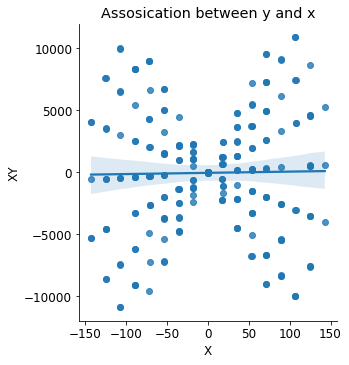

In [10]:
figure = sns.lmplot(data=Overlay_new,x='X',y='XY')
ax = plt.gca()
ax.set_title('Assosication between y and x')

In [200]:
lasso_model_x =  Lasso(alpha = 5**1)
overlay_x_fitted_lasso=lasso_model_x.fit(Overlay_new.loc[:,' x':],Overlay_new['overlay_error_x'])
#lasso_model_x.intercept_
lasso_model_x.coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.89437074e-05,
       -5.55877538e-05, -0.00000000e+00, -4.56338216e-05, -1.30401500e-05,
        0.00000000e+00,  7.49570292e-04, -0.00000000e+00, -0.00000000e+00,
        9.53571581e-04, -1.38298535e-04,  2.39846117e-08,  4.31837209e-08])

In [152]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split

In [153]:
linear_model_x = lm.LinearRegression(fit_intercept=True)
linear_model_y = lm.LinearRegression(fit_intercept=True)

In [154]:
def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    train_indices= shuffled_indices[0:int(0.8*data_len)]
    test_indices= shuffled_indices[int(0.8*data_len):]
    train = data.iloc[train_indices] 
    test = data.iloc[test_indices]
    return train, test

In [175]:
selector=SelectKBest(f_regression,k=15)

In [176]:
Overlay_new_featured = pd.DataFrame(selector.fit_transform(Overlay_new.loc[:,' x':],Overlay_new['overlay_error_x']))
Overlay_new_featured


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5.29290,-142.580,5.64470,-28.385,4047.13330,29.876833,20329.056400,28.014790,31.862638,-150.238967,-150.238967,148.279484,179.855033,-2.898517e+06,-2.287003e+04
1,9.24490,-142.500,16.31900,-28.165,4013.51250,150.867523,20306.250000,85.468176,266.309761,-260.382609,-260.382609,790.144740,4345.908990,-2.893641e+06,-2.234237e+04
2,9.17130,-124.980,16.33700,-28.421,3552.05658,149.831528,15620.000400,84.112744,266.897569,-260.657517,-260.657517,771.423206,4360.305585,-1.952188e+06,-2.295715e+04
3,0.15941,-125.040,0.80494,-28.047,3506.99688,0.128315,15635.001600,0.025412,0.647928,-4.470972,-4.470972,0.004051,0.521543,-1.955001e+06,-2.206273e+04
4,9.26150,-107.150,-4.21550,-28.096,3010.48640,-39.041853,11481.122500,85.775382,17.770440,-260.211104,-260.211104,794.408703,-74.911291,-1.230202e+06,-2.217857e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,3.70370,35.641,-15.85400,134.160,4781.59656,-58.718460,1270.280881,13.717394,251.349316,496.888392,496.888392,50.805111,-3984.892056,4.527408e+04,2.414733e+06
246,-3.59770,35.855,-5.38070,134.200,4811.74100,19.358144,1285.581025,12.943445,28.951932,-482.811340,-482.811340,-46.566633,-155.781663,4.609451e+04,2.416894e+06
247,-3.82000,53.422,-5.03920,134.060,7161.75332,19.249744,2853.910084,14.592400,25.393537,-512.109200,-512.109200,-55.742968,-127.963110,1.524616e+05,2.409338e+06
248,-8.72960,71.264,-15.66900,134.020,9550.80128,136.784102,5078.557696,76.205916,245.517561,-1169.940992,-1169.940992,-665.247166,-3847.014663,3.619183e+05,2.407182e+06


In [144]:
model=lm.LinearRegression(fit_intercept=True)
np.random.seed(327)
train,test=train_test_split(Overlay_new)
trainX=train.loc[:,' x':]
testx= test.loc[:,' x':]
train_tag=train.loc[:,['overlay_error_x']]
test_tag=test.loc[:,['overlay_error_x']]


In [145]:
np.random.seed(327)
train_new,test_new=train_test_split(Overlay_new_featured)
trainX_new=train_new
testx_new= test_new

#test_tag_new=testx_new[0]

In [171]:
model.fit(trainX,train_tag)
score = model.score(testx,test_tag)
x_pred=model.predict(testx)
r2 = r2_score(test_tag,x_pred)
mse = mean_squared_error(test_tag,x_pred)
print(r2)
print(mse)

0.6225561276290043
0.3500081251805687


In [178]:
model2=lm.LinearRegression(fit_intercept=True)
model2.fit(trainX_new,train_tag)
#score = model.score(testx_new,test_tag_new)
x_pred_new=model2.predict(testx_new)
r2_new = r2_score(test_tag,x_pred_new)
mse_new = mean_squared_error(x_pred_new,test_tag)
print(r2_new)
print(mse_new)

0.6629616843784014
0.31253957899409646


In [177]:
model2.fit(Overlay_new_featured,Overlay_new.loc[:,['overlay_error_x']])
x_pred_new = model2.predict(Overlay_new_featured)
r2_new = r2_score(Overlay_new.loc[:,['overlay_error_x']],x_pred_new)
print(r2_new)

0.6089499839733692


In [120]:
overlay_x_fitted = linear_model_x.fit(Overlay_new.loc[:,' x':'y2'],Overlay_new['overlay_error_x'])
overlay_y_fitted = linear_model_y.fit(Overlay_new.loc[:,' x':'y2'],Overlay_new[' overlay_error_y'])


In [138]:
alpha0_x = linear_model_x.intercept_
beta0_y = linear_model_y.intercept_
alpha1_x,alpha2_x,alpha3_x,alpha4_x,alpha5_x,alpha6_x,alpha7_x,alpha8_x,alpha9_x,alpha10_x = linear_model_x.coef_
beta1_y,beta2_y,beta3_y,beta4_y,beta5_y,beta6_y,beta7_y,beta8_y,beta9_y,beta10_y = linear_model_y.coef_
print("x Model\n a0: {}\n a1: {}\n a2: {}\n a3: {}\n  a4: {}\n  a5: {}\n  a6: {}\n  a7: {}\n  a8: {}\n a9: {}\n a10: {}\n  ".format(alpha0_x, alpha1_x, alpha2_x, alpha3_x, alpha4_x, alpha5_x, alpha6_x, alpha7_x, alpha8_x, alpha9_x, alpha10_x))
print("y Model\n b0: {}\n b1: {}\n b2: {}\n b3: {}\n  b4: {}\n  b5: {}\n  b6: {}\n  b7: {}\n  b8: {}\n b9: {}\n b10: {}\n  ".format(beta0_y, beta1_y,beta2_y,beta3_y,beta4_y,beta5_y,beta6_y,beta7_y,beta8_y,beta9_y,beta10_y))

x Model
 a0: -0.26242293656541776
 a1: 0.06659785305233948
 a2: 0.0006521140863868932
 a3: -0.03459591642147993
  a4: 0.00127669147159566
  a5: -5.613699959082805e-05
  a6: -0.0003528956942671774
  a7: -4.621017431012736e-05
  a8: -1.3114161682993513e-05
 a9: 0.0029392956866490356
 a10: 0.001051515356579881
  
y Model
 b0: 0.7064808593340008
 b1: 0.016310793800384873
 b2: 0.002643553598162503
 b3: 0.013139455237183404
  b4: 0.0035841682043967244
  b5: 3.045577011886164e-06
  b6: 0.000787552844111255
  b7: 5.517673231304482e-06
  b8: -9.487624931984192e-06
 b9: -0.0033503740684756858
 b10: 0.0026507377132773983
  


In [67]:
#Vif Examine
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Vif_Examiner(data):
    issue = []
    for i in range(0,10):
        vif=variance_inflation_factor(data, i)
        if vif>=5:
            issue.append(i)
    return issue
Vif_Examiner(design_matrix)
#design_matrix['X'].corr(design_matrix['X2'],method='pearson')

[]

In [65]:
np.set_printoptions(suppress=True)
np.array(design_matrix['X2'])

array([20329.0564    , 20306.25      , 15620.0004    , 15635.0016    ,
       11481.1225    ,  7963.242169  ,  7968.775824  ,  5055.494404  ,
        5117.9716    ,  2854.016929  ,  2877.035044  ,  2840.89      ,
        2876.820496  ,  1268.998129  ,  1251.319876  ,   318.6225    ,
         312.865344  ,   315.808441  ,  1275.132681  ,  2864.711529  ,
        2859.147841  ,  2897.022976  ,  5118.543936  ,  5138.452489  ,
        5100.959241  ,  8013.472324  ,  7930.080601  ,  7983.958609  ,
       11511.1441    , 11451.1401    , 15677.5441    , 15655.0144    ,
       15662.5225    , 20411.8369    , 15660.0196    , 15600.01      ,
       15587.5225    , 15600.01      ,  7981.814281  ,  5128.994689  ,
        5090.537104  ,  2868.459364  ,  2893.041369  ,  2879.824896  ,
        2900.037904  ,  1268.214544  ,  1290.533776  ,  2849.637924  ,
        2872.424025  ,  5087.683584  ,  5093.105956  ,  5078.842756  ,
        5064.457225  ,  7985.030881  ,  7921.178001  ,  7919.398081  ,
      

In [42]:
#Model Evaluation
print(overlay_x_fitted.score(Overlay_new.loc[:,' x':'y2'],Overlay_new['overlay_error_x']))
#print(overlay_x_fitted_lasso.score(Overlay_new.loc[:,'y':'y2'],Overlay_new['overlay_error_x']))

0.5776113073682478
